In [1]:
# ========================================================================
#                  Seaborn Essentials for Econometrics
# ========================================================================
#    Module: Basic Economic Visualizations with Seaborn
#    Topic: Essential Plots for Economic Analysis
#    
#    Description:
#      In this notebook, we'll explore the fundamental visualization types using 
#     Seaborn, with focus on economic applications. 
#    
#    Contents:
#      1. Line plots for time series data
#      2. Bar plots for comparisons
#      3. Scatter plots for relationships
#      4. Distribution plots for analysis
#    
#    Author: Dr. Saad Laouadi
#    Version: 1.0
#    
# ========================================================================
#  ®Copyright Dr. Saad Laouadi, 2025. All rights reserved.
# ========================================================================

In [2]:
# ====================================================
#     Environment Setup: Import Required Libraries
# ====================================================
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and figure size defaults
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# Set random seed for reproducibility
np.random.seed(1010)

print("-"*52)
%reload_ext watermark
%watermark -a "Dr. Saad Laouadi"
%watermark -iv -ud
print("-"*52)

----------------------------------------------------
Author: Dr. Saad Laouadi

Last updated: 2025-03-10

numpy     : 1.26.4
seaborn   : 0.13.2
matplotlib: 3.10.0
sys       : 3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:54:21) [Clang 16.0.6 ]
pandas    : 2.2.3

----------------------------------------------------


In [3]:
# Create sample economic data
np.random.seed(1010)    # to get the same results every time I run this cell

# Time series data
dates = pd.date_range(start='2018', end='2023', freq='QE')
dates

DatetimeIndex(['2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31'],
              dtype='datetime64[ns]', freq='QE-DEC')

In [4]:
# Generate Random Economic Data
np.random.seed(1010)
economic_data = pd.DataFrame({
    'Date': dates,
    'GDP_Growth': np.random.normal(2, 1, len(dates)),
    'Inflation': np.random.normal(3, 0.5, len(dates)),
    'Unemployment': np.random.normal(5, 0.8, len(dates)),
    'Interest_Rate': np.random.normal(2.5, 0.3, len(dates))
})

In [5]:
# Check the data head
economic_data.head()

,Date,GDP_Growth,Inflation,Unemployment,Interest_Rate
0,2018-03-31,0.824552,3.381484,3.854217,2.489989
1,2018-06-30,1.616852,2.500561,4.757862,2.112536
2,2018-09-30,0.528634,3.504632,4.532357,2.652052
3,2018-12-31,0.199431,2.876107,5.637550,2.623801
4,2019-03-31,2.130100,1.708241,4.371009,2.359379


In [6]:
economic_data.columns.tolist() # []

['Date', 'GDP_Growth', 'Inflation', 'Unemployment', 'Interest_Rate']

In [7]:
economic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           20 non-null     datetime64[ns]
 1   GDP_Growth     20 non-null     float64       
 2   Inflation      20 non-null     float64       
 3   Unemployment   20 non-null     float64       
 4   Interest_Rate  20 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 932.0 bytes


In [8]:
economic_data.index

RangeIndex(start=0, stop=20, step=1)

## 1. Line Plots for Time Series

Line plots are essential for visualizing economic trends over time. Common applications include:
* GDP growth trends
* Inflation rates
* Unemployment rates

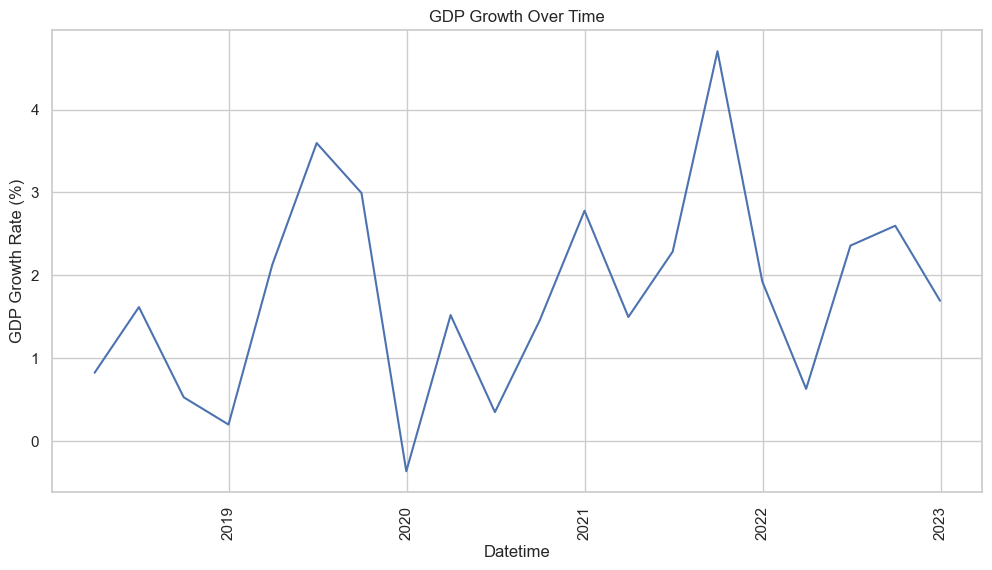

In [9]:
# Single line plot
plt.figure(figsize = (12, 6))

sns.lineplot(data=economic_data,
             x='Date',
             y='GDP_Growth')

plt.title("GDP Growth Over Time")
plt.ylabel('GDP Growth Rate (%)')
plt.xlabel("Datetime")
plt.xticks(rotation=90)

# plt.savefig("gdp_growth.png", dpi=300)
plt.show()

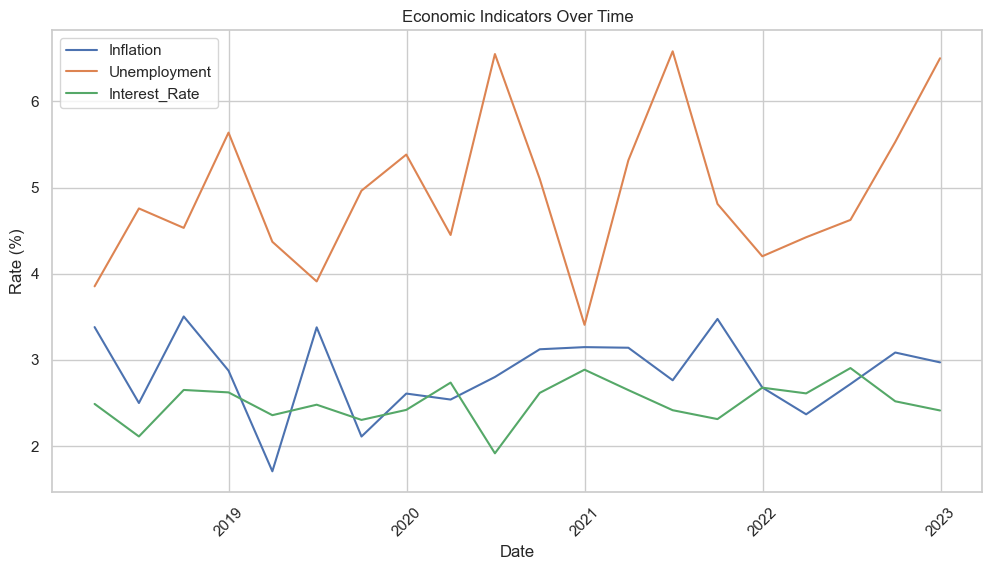

In [10]:
# Multiple line plot
plt.figure(figsize = (12, 6))
# Plot multiple indicators

for column in ['Inflation', 'Unemployment', 'Interest_Rate']:
    sns.lineplot(data=economic_data, x='Date', y=column, label=column)
    
plt.title('Economic Indicators Over Time')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Customizing Line Plots

Let's add some professional touches to our line plots:

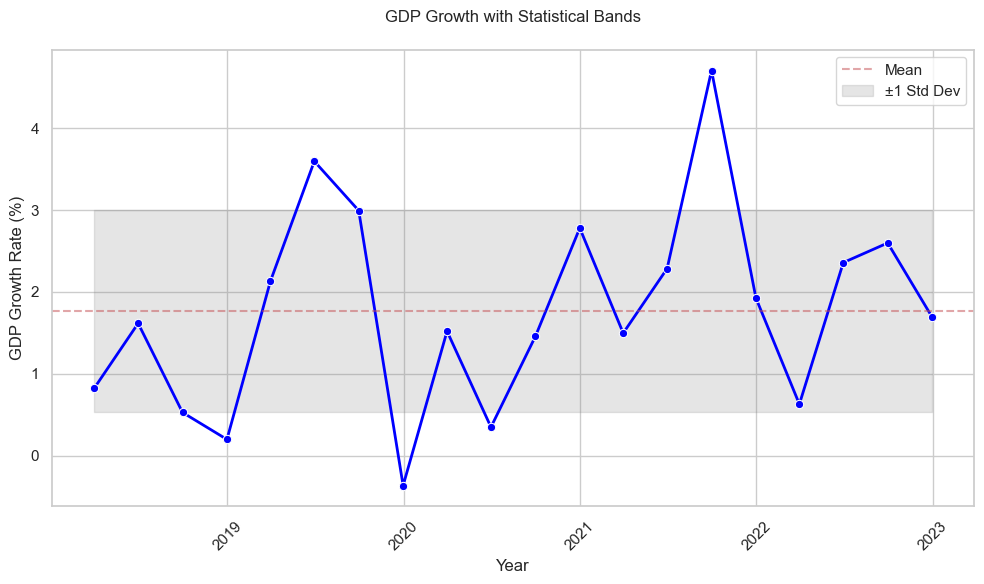

In [11]:
plt.figure()
# Create styled line plot
sns.lineplot(data=economic_data, x='Date', y='GDP_Growth', 
            marker='o',    # Add markers
            linewidth=2,   # Thicker line
            color='blue'   # Specific color
           )

# Add confidence interval
mean = economic_data['GDP_Growth'].mean()
std = economic_data['GDP_Growth'].std()

plt.axhline(y=mean, color='r', linestyle='--', alpha=0.5, label='Mean')

plt.fill_between(economic_data['Date'],
                 mean - std,
                 mean + std,
                 alpha=0.2,
                 color='gray',
                 label='±1 Std Dev')

plt.title('GDP Growth with Statistical Bands', pad=20)
plt.ylabel('GDP Growth Rate (%)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

## 2. Bar Plots for Comparisons

Bar plots are excellent for comparing economic indicators across categories, such as:
* GDP by country
* Sector contributions to GDP
* Regional economic comparisons

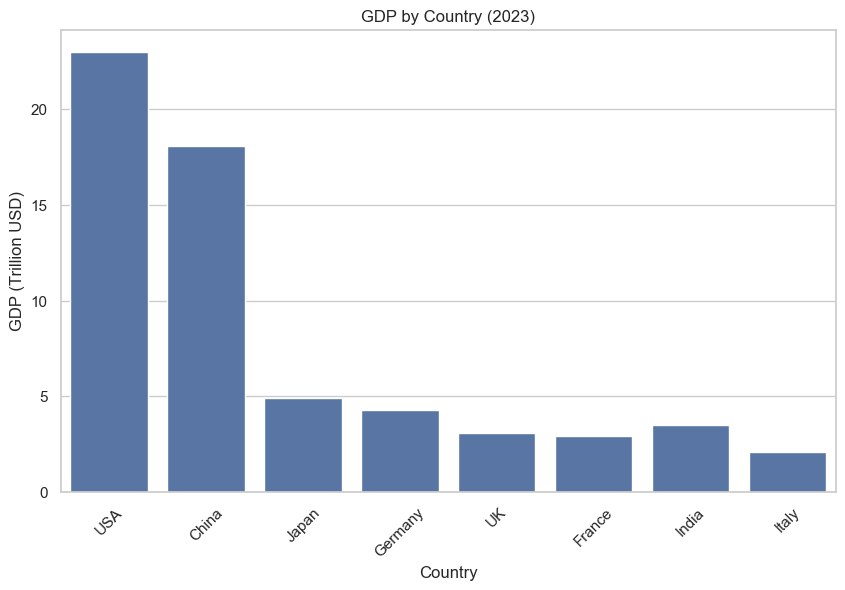

In [12]:
# Create sample cross-sectional data
countries = ['USA', 'China', 'Japan', 'Germany', 'UK', 'France', 'India', 'Italy']

gdp_data = pd.DataFrame({
    'Country': countries,
    'GDP_Trillion': [23.0, 18.1, 4.9, 4.3, 3.1, 2.9, 3.5, 2.1],
    'Growth_Rate': [2.1, 5.2, 1.0, 1.8, 1.2, 1.7, 6.1, 0.9]
})

# Basic bar plot
plt.figure()
sns.barplot(data=gdp_data, x='Country', y='GDP_Trillion')
plt.title('GDP by Country (2023)')
plt.ylabel('GDP (Trillion USD)')
plt.xticks(rotation=45)
plt.show()

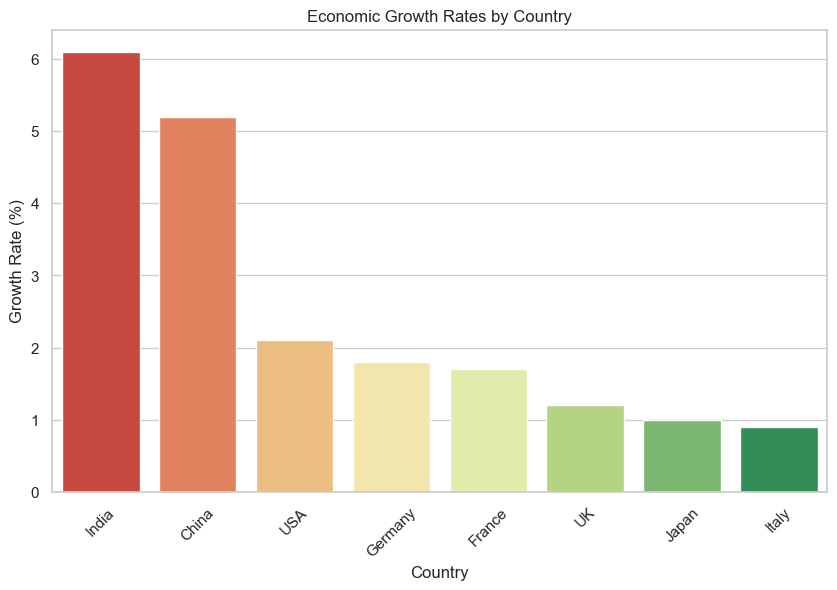

In [13]:
# Ordered bar plot with custom colors
plt.figure()
gdp_sorted = gdp_data.sort_values('Growth_Rate', ascending=False)
sns.barplot(data=gdp_sorted,
            x='Country',
            y='Growth_Rate',
            hue = 'Country',
            legend = False,
           palette='RdYlGn'  # Red to Green palette
          )
plt.title('Economic Growth Rates by Country')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.show()

## 3. Scatter Plots for Relationships

Scatter plots help visualize relationships between economic variables, such as:
* Phillips Curve (Inflation vs. Unemployment)
* Income vs. Education
* Investment vs. Growth

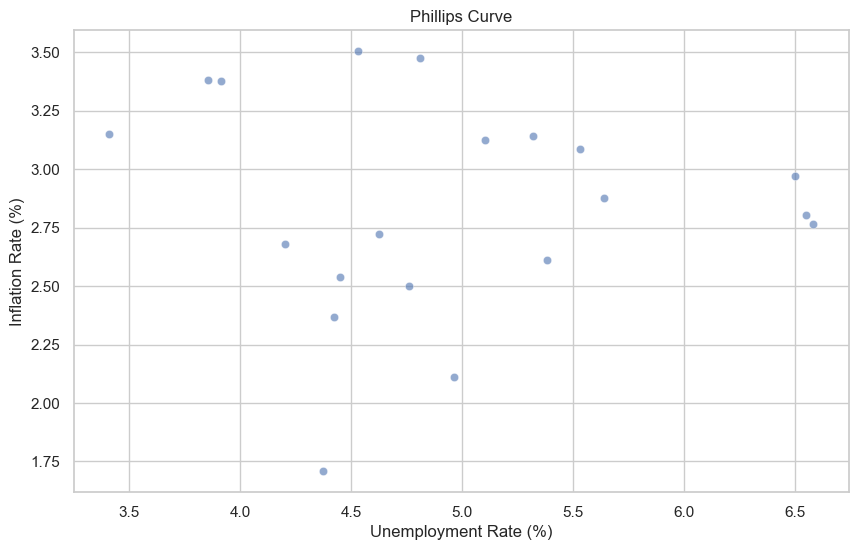

In [14]:
# Basic scatter plot (Phillips Curve)
plt.figure()
sns.scatterplot(data=economic_data, 
                x='Unemployment', 
                y='Inflation',
                alpha=0.6)

plt.title('Phillips Curve')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Inflation Rate (%)')
plt.show()

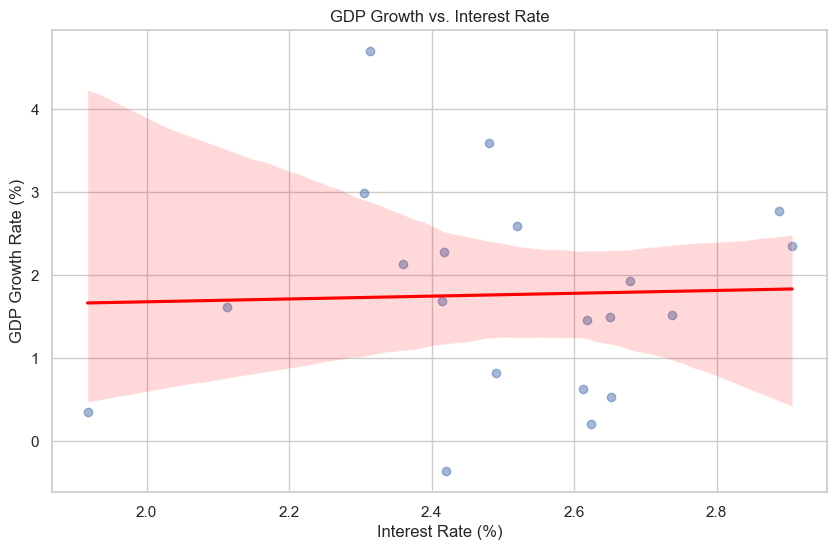

In [15]:
# Scatter plot with regression line
plt.figure()
sns.regplot(data=economic_data,
           x='Interest_Rate',
           y='GDP_Growth',
           scatter_kws={'alpha':0.5},
           line_kws={'color': 'red'})

plt.title('GDP Growth vs. Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('GDP Growth Rate (%)')
plt.show()

## 4. Distribution Plots

Distribution plots help understand the spread and pattern of economic variables:

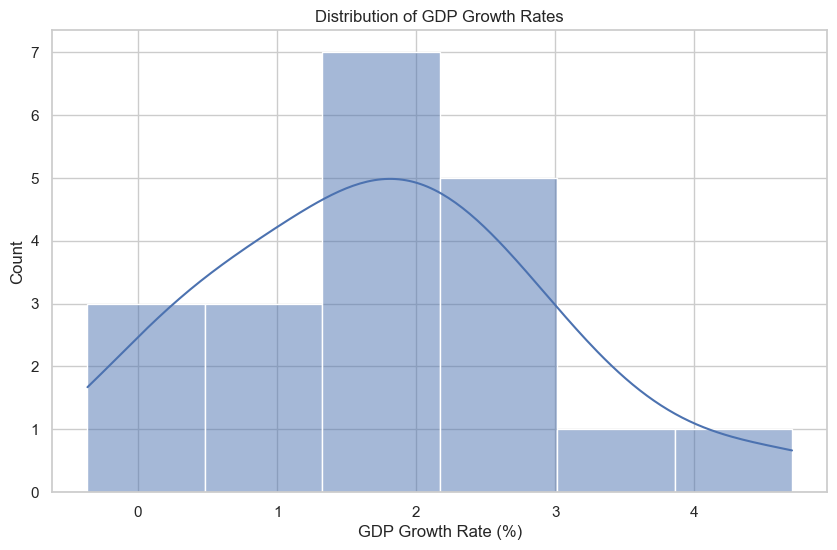

In [16]:
# Histogram
plt.figure()
sns.histplot(data=economic_data, x='GDP_Growth', kde=True)
plt.title('Distribution of GDP Growth Rates')
plt.xlabel('GDP Growth Rate (%)')
plt.show()

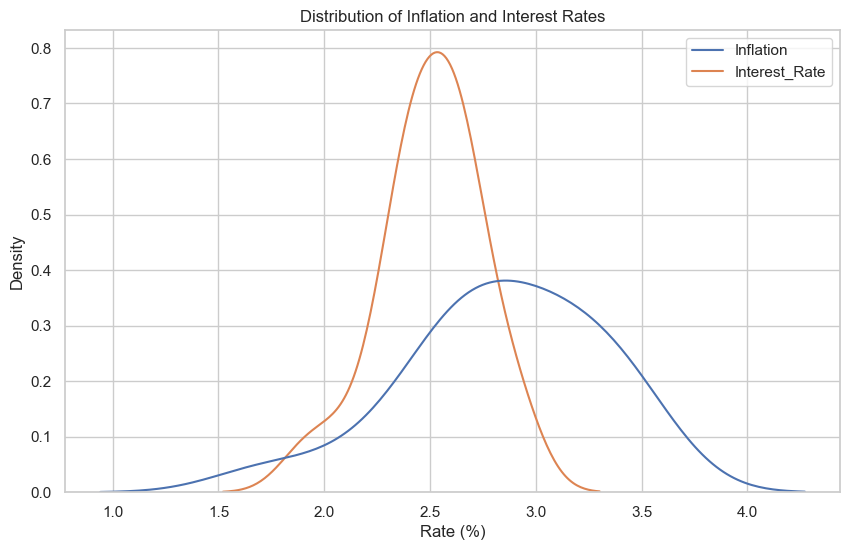

In [17]:
# Multiple distributions
plt.figure()
sns.kdeplot(data=economic_data[['Inflation', 'Interest_Rate']])
plt.title('Distribution of Inflation and Interest Rates')
plt.xlabel('Rate (%)')
plt.show()

## Practice Exercises

1. Create a line plot showing:
   * Multiple economic indicators
   * Proper legend and labels
   * Confidence intervals

2. Create a bar plot comparing:
   * GDP components across countries
   * Order bars by value
   * Add value labels on bars

3. Create a scatter plot showing:
   * GDP per capita vs. Education spending
   * Add a regression line
   * Color points by region

## Summary

* Line plots are best for time series trends
* Bar plots work well for comparisons
* Scatter plots reveal relationships
* Distribution plots show data patterns

## Next Steps

In the next notebook, we'll cover:
* Advanced statistical visualizations
* Multiple variable relationships
* Custom styles and themes